In [1]:
import pandas as pd

In [2]:
spam = pd.read_csv('spam.csv',engine='python',encoding='ISO-8859-1')
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
spam = spam.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [4]:
spam = spam.rename(columns={'v1':'category','v2':'text'})
spam.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   text      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
spam.isnull().sum()

category    0
text        0
dtype: int64

In [7]:
spam.shape

(5572, 2)

In [8]:
spam.duplicated().sum()

403

In [9]:
spam = spam.drop_duplicates()
spam.shape

(5169, 2)

In [10]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
spam['category'] = label.fit_transform(spam['category'])

In [11]:
spam.head()

,category,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
spam.category.value_counts()

0    4516
1     653
Name: category, dtype: int64

C:\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

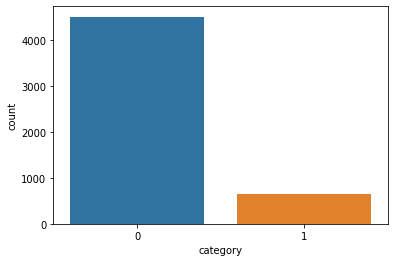

In [13]:
import seaborn as sns
sns.countplot(spam.category)

In [16]:
import re
import nltk
from nltk import PorterStemmer
portstem = PorterStemmer()
def stemming(text):
    text = re.sub('[^a-zA-Z)]',' ',text)
    text = text.lower()
    text = text.split()
    text = [portstem.stem(words) for words in text]
    text = " ".join(text)
    return text

In [18]:
spam['messages'] = spam['text'].apply(stemming)

In [19]:
spam.head()

,category,text,messages
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in a wkli comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goe to usf he live around...


In [75]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vector = CountVectorizer(stop_words='english')
# vector = TfidfVectorizer(stop_words='english')
x = vector.fit_transform(spam.messages).toarray()

In [76]:
y = spam.category

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [78]:
y_train.shape

(4135,)

In [79]:
x_test.shape

(1034, 6129)

In [132]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model = MultinomialNB()
# model = RandomForestClassifier()
# model = LogisticRegression(max_iter=10000)

In [133]:
model.fit(x_train,y_train)

MultinomialNB()

In [134]:
model.score(x_test,y_test)

0.97678916827853

In [135]:
predict = model.predict(x_test)

In [136]:
from sklearn.metrics import precision_score,f1_score
precision_score(predict,y_test)

0.9517241379310345

In [137]:
f1_score(predict,y_test)

0.9200000000000002